In [1]:
import pandas as pd
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from datetime import datetime
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

In [269]:
place = 'Taoyuan'
path = f'../DataBase/Temperature/{place}'

read_col = ['Time', 'Temp', 'Light']

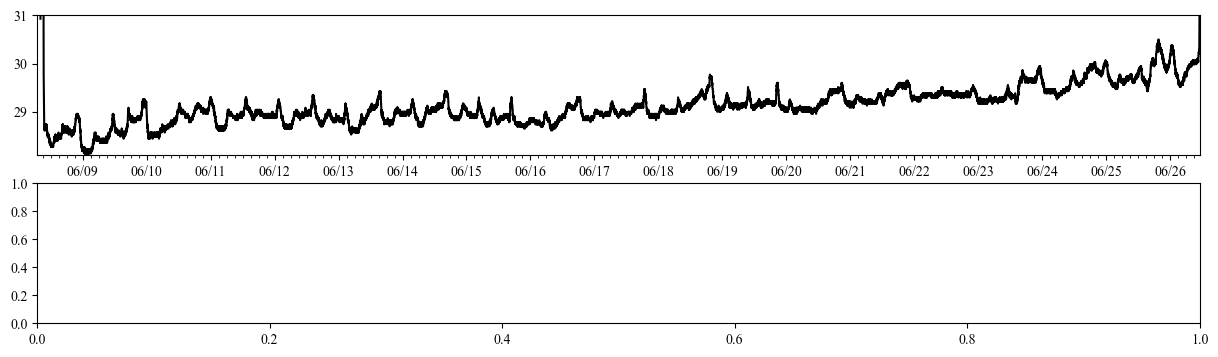

In [270]:
for filepath in sorted(glob.glob(f'{path}/*xlsx'))[4:5]:

    filename = filepath.rsplit('/')[-1]
    year = 2022 if filename[:2] == '22' else 2023
    

    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 
    begintime = pd.to_datetime(str(df['Time'].values[0]))
    endtime   = pd.to_datetime(str(df['Time'].values[-1]))
    
    
    plt.rcParams["font.family"] = "Times New Roman"
    fig, ax = plt.subplots(2,1, figsize=(15,4))
    
    ax[0].plot(df['Time'], df['Temp'], 'k')
    ax[0].set_xlim(datetime(begintime.year,begintime.month,begintime.day,begintime.hour-1,0), datetime(endtime.year,endtime.month,endtime.day,endtime.hour+1))
    ax[0].set_ylim(min(df['Temp']), 31)#np.mean(df['Temp'])+6)
#     ax[0].set_ylabel('Temperature (°C)', fontsize=10)
    ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
    ax[0].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
    

#     ax[1].plot(df['Time'], df['Light'], 'k')
#     ax[1].set_xlim(datetime(begintime.year,begintime.month,begintime.day,begintime.hour-1,0), datetime(endtime.year,endtime.month,endtime.day,endtime.hour+1))  
#     ax[1].set_ylim(0, np.mean(df['Light'])*15) # 27 
#     ax[1].set_ylabel('Illumination (lux)', fontsize=10)
#     ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
#     ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
#     ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes  
    
#     plt.suptitle(f'{place} {year}', fontsize=14)
#     plt.savefig(f'../Results/hobo/{place}_hobo_{filename.rsplit(".")[0]}.png', dpi=150)
#     plt.savefig(f'../Results/hobo/{place}_hobo_{filename.rsplit(".")[0]}.pdf', dpi=150)

../DataBase/PAM_pickle/Taoyuan/Taoyuan_060808-062321-30min.pkl


(73.0, 100.0)

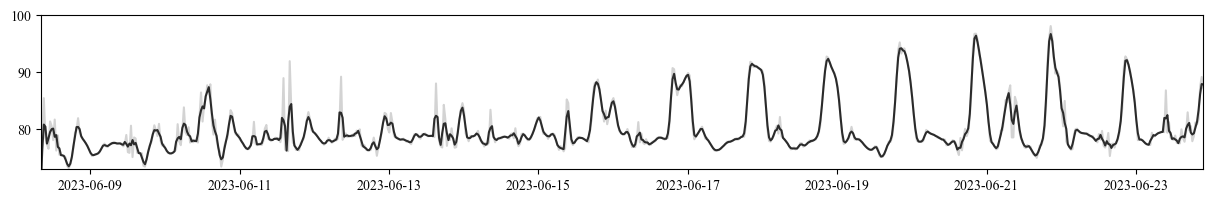

In [271]:
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}/Taoyuan_060808-062321-30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
    
freqmin = 300
freqmax = 2000
fig, ax = plt.subplots(1,1 ,figsize=(15,2))
plt.subplots_adjust(hspace=0.3)

ax.plot(alldate,np.max(newarray[freqmin:freqmax, :], axis=0), 'lightgrey')
ax.plot(alldate,savgol_filter(np.max(newarray[freqmin:freqmax, :], axis=0), window_length=3, polyorder=1, mode='nearest'),'k', alpha=0.8)
ax.set_xlim(alldate[0], alldate[-1])
ax.set_ylim(73,100)

## Temp v.s. SPL

In [12]:
night = list(range(17,24))+list(range(0,6))

2023-06-08 08:05:17


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_69113/4051699687.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(SPL_level[i], df_['Temp'].values[0], c=cmap(i),
/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_69113/4051699687.py:13: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(SPL_level[i], df_['Temp'].values[0], c=cmap(i),


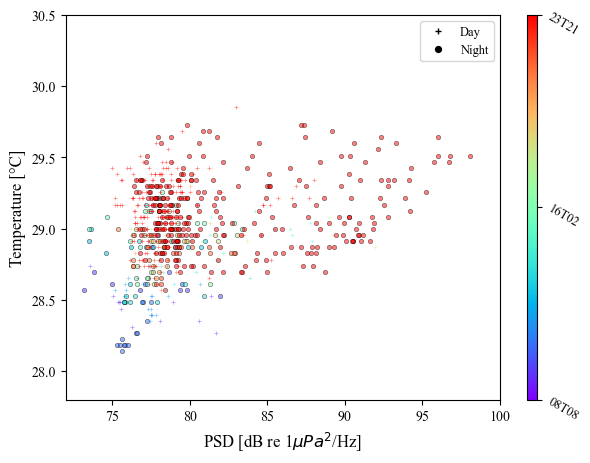

In [273]:
fig, ax = plt.subplots(figsize=(7,5))
SPL_level = np.max(newarray[freqmin:freqmax, :], axis=0)
cmap = plt.colormaps["rainbow"]
for i, date in enumerate(alldate):
    dd = str(date.day).zfill(2)
    hh = str(date.hour).zfill(2)
    mm = str(date.minute).zfill(2)
    
    df_ = df[df['Time']==np.datetime64(f'2023-06-{dd} {hh}:{mm}:17')]
    symbol = 'o' if int(hh) in night else '+'
    
    try:
        ax.scatter(SPL_level[i], df_['Temp'].values[0], c=cmap(i), 
                   s=10, marker=symbol, edgecolors='black', linewidths=0.5, alpha=0.5 )
    except:
        print(f'2023-06-{dd} {hh}:{mm}:17')

        
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=colors.Normalize(0, 1), cmap=cmap),
             ax=ax, ticks=[0, 0.5, 1], aspect=40)
# cbar.ax.set_ylabel("Day in 2023 June", rotation=270)
cbar.ax.tick_params(labelsize=9, rotation=-30)
cbar.ax.set_yticklabels(['08T08', '16T02', '23T21']) # add the labels
plt.ylim(27.8, 30.5)
plt.xlim(72, 100)
plt.xlabel('PSD [dB re 1'r'$\mu Pa^2$/Hz]', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)

import matplotlib.lines as mlines

Day = mlines.Line2D([], [], color='black', marker='+', ls='', label='Day')
Night = mlines.Line2D([], [], color='black', marker='o', ls='', label='Night')
# etc etc
plt.legend(handles=[Day, Night], markerscale=0.7, scatterpoints=1, fontsize=9)
plt.savefig('../Results/hobo/Taoyuan_202306_temp_SPL_relation.png', dpi=150)
plt.savefig('../Results/hobo/Taoyuan_202306_temp_SPL_relation.pdf', dpi=150)

230818-230915.xlsx
2023-08-18T09:47:15.000000000
../DataBase/PAM_pickle/Taoyuan/Taoyuan_081811-090220-30min.pkl


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_69113/2239509543.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(SPL_level[i], df_['Temp'].values[0], c='b',


230608-230626.xlsx
2023-06-08T08:13:17.000000000
../DataBase/PAM_pickle/Taoyuan/Taoyuan_060808-062321-30min.pkl
2023-06-08 08:05:17


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_69113/2239509543.py:67: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(SPL_level[i], df_['Temp'].values[0], c='red',


230414-230504.xlsx
2023-04-14T09:10:00.000000000
../DataBase/PAM_pickle/Taoyuan/Taoyuan_041412-050112-30min.pkl


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_69113/2239509543.py:101: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(SPL_level[i], df_['Temp'].values[0], c='orange',


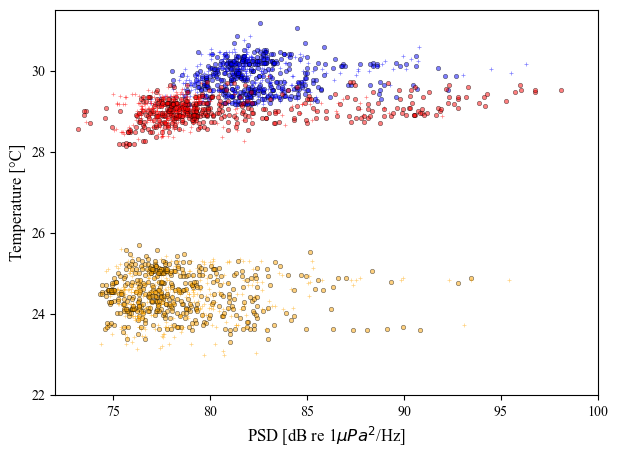

In [279]:
fig, ax = plt.subplots(figsize=(7,5))
cmap = plt.colormaps["rainbow"]
freqmin = 300
freqmax = 2000

for filepath in sorted(glob.glob(f'{path}/2308*.xlsx')):
    filename = filepath.rsplit('/')[-1]
    print(filename)
    year = 2022 if filename[:2] == '22' else 2023

    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 
    begintime = pd.to_datetime(str(df['Time'].values[0]))
    endtime   = pd.to_datetime(str(df['Time'].values[-1]))
print(df['Time'].values[0])
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}/{place}_08*30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
SPL_level = np.max(newarray[freqmin:freqmax, :], axis=0)    
for i, date in enumerate(alldate):
    MM = str(date.month).zfill(2)
    dd = str(date.day).zfill(2)
    hh = str(date.hour).zfill(2)
    mm = str(date.minute).zfill(2)
    
    df_ = df[df['Time']==np.datetime64(f'2023-{MM}-{dd} {hh}:{mm}:15')]
    symbol = 'o' if int(hh) in night else '+'
    
    try:
        ax.scatter(SPL_level[i], df_['Temp'].values[0], c='b', 
                   s=10, marker=symbol, edgecolors='black', linewidths=0.5, alpha=0.5 )
    except:
        print(f'2023-{MM}-{dd} {hh}:{mm}:15')

#===================================================================================================
for filepath in sorted(glob.glob(f'{path}/2306*.xlsx')):
    filename = filepath.rsplit('/')[-1]
    print(filename)
    year = 2022 if filename[:2] == '22' else 2023

    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 
    
print(df['Time'].values[0])
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}/{place}_06*30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
SPL_level = np.max(newarray[freqmin:freqmax, :], axis=0)    
for i, date in enumerate(alldate):
    MM = str(date.month).zfill(2)
    dd = str(date.day).zfill(2)
    hh = str(date.hour).zfill(2)
    mm = str(date.minute).zfill(2)
    
    df_ = df[df['Time']==np.datetime64(f'2023-{MM}-{dd} {hh}:{mm}:17')]
    symbol = 'o' if int(hh) in night else '+'
    
    try:
        ax.scatter(SPL_level[i], df_['Temp'].values[0], c='red', 
                   s=10, marker=symbol, edgecolors='black', linewidths=0.5, alpha=0.5 )
    except:
        print(f'2023-{MM}-{dd} {hh}:{mm}:17')
        
#===================================================================================================
for filepath in sorted(glob.glob(f'{path}/2304*.xlsx')):
    filename = filepath.rsplit('/')[-1]
    print(filename)
    year = 2022 if filename[:2] == '22' else 2023

    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 
print(df['Time'].values[0])    
    
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}/{place}_04*30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
    
SPL_level = np.max(newarray[freqmin:freqmax, :], axis=0)    
for i, date in enumerate(alldate):
    MM = str(date.month).zfill(2)
    dd = str(date.day).zfill(2)
    hh = str(date.hour).zfill(2)
    mm = str(date.minute).zfill(2)
    
    df_ = df[df['Time']==np.datetime64(f'2023-{MM}-{dd} {hh}:{mm}:00')]
    symbol = 'o' if int(hh) in night else '+'
    
    try:
        ax.scatter(SPL_level[i], df_['Temp'].values[0], c='orange', 
                   s=10, marker=symbol, edgecolors='black', linewidths=0.5, alpha=0.5 )
    except:
        print(f'2023-{MM}-{dd} {hh}:{mm}:00')
        
        
plt.ylim(22, 31.5)
plt.xlim(72, 100)
plt.xlabel('PSD [dB re 1'r'$\mu Pa^2$/Hz]', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)

plt.savefig('../Results/hobo/Taoyuan_2023_temp_SPL_relation.pdf', dpi=200)
plt.savefig('../Results/hobo/Taoyuan_2023_temp_SPL_relation.png', dpi=200)

## tide variation

In [165]:
tide = '../DataBase/Data_cwa/2023_1116_竹圍_tide.csv'
dtide = pd.read_csv(tide, skiprows=20)
# dtide = dtide[dtide['yyyymmddhh'] >= 2023041412][dtide['yyyymmddhh'] <= 2023050114]
dtide = dtide[dtide['yyyymmddhh'] >= 2023060808][dtide['yyyymmddhh'] <= 2023062321]

/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_83712/643635105.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dtide = dtide[dtide['yyyymmddhh'] >= 2023060808][dtide['yyyymmddhh'] <= 2023062321]


In [169]:
datelist = []
tidelist = []
for time in dtide['yyyymmddhh']:
    timestr = str(time)
    yyyy = int(timestr[:4])
    mm  = int(timestr[4:6])
    dd = int(timestr[6:8])
    hh = int(timestr[8:10])
    dtide_temp = dtide[dtide['yyyymmddhh']==time]
    for minn_str in [':00', ':06', ':12', ':18', ':24', ':30', ':36', ':42', ':48', ':54']:
        tideheight = dtide_temp[minn_str].values[0]
        minn = int(minn_str.rsplit(':')[-1])
        datelist.append(datetime(yyyy,mm,dd,hh,minn))
        tidelist.append(tideheight)
        

diff_height = []
for j in range(len(tidelist)):
    if j+1 != len(tidelist):
        h1 = tidelist[j]
        h2 = tidelist[j+1]

        diff = (h2 - h1)/(6*60)
        diff_height.append(diff)

../DataBase/PAM_pickle/Taoyuan/Taoyuan_060808-062321-30min.pkl


(85.0, 120.0)

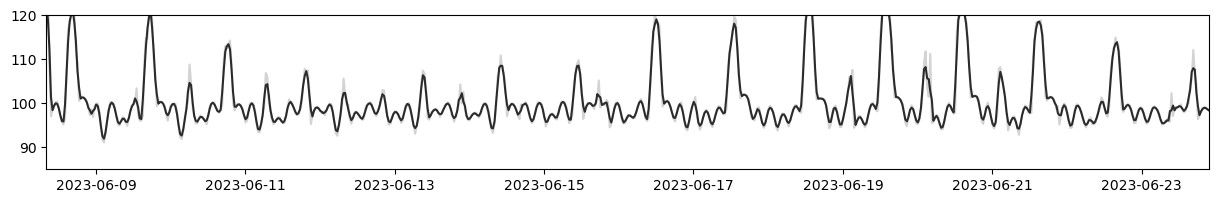

In [179]:
place = 'Taoyuan'
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}/Taoyuan_060808-062321-30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
    
freqmin = 0
freqmax = 200
fig, ax = plt.subplots(1,1 ,figsize=(15,2))
plt.subplots_adjust(hspace=0.3)

ax.plot(alldate,np.max(newarray[freqmin:freqmax, :], axis=0), 'lightgrey')
ax.plot(alldate,savgol_filter(np.max(newarray[freqmin:freqmax, :], axis=0), window_length=3, polyorder=1, mode='nearest'),'k', alpha=0.8)
ax.set_xlim(alldate[0], alldate[-1])
ax.set_ylim(85,120)

/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_83712/1340343640.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(min_number, select_min_diff, c='b',


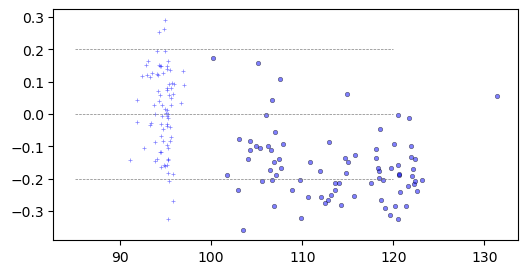

In [180]:
fig, ax = plt.subplots(figsize=(6,3))   
freqmin = 0
freqmax = 300
SPL_level = np.max(newarray[freqmin:freqmax, :], axis=0)  
alldate_array = np.array(alldate)
for day in range(8, 24):
    
    day = day if day!=31 else 1
    MM  = 6 if day!=1 else 5
    select_idx  = [np.where((alldate_array > datetime(2023,MM,day,0)) & (alldate_array < datetime(2023,MM,day,23,59)))]
    select_date = alldate_array[select_idx]
    
    select_SPL  = SPL_level[select_idx[0]]
    max_number = heapq.nlargest(5, select_SPL) 
    max_index = []
    min_number = heapq.nsmallest(5, select_SPL) 
    min_index = []
    for i in max_number:
        index = np.where(select_SPL==i)[0][0]
        max_index.append(index)
        select_SPL[index] = 0

    for i in min_number:
        index = np.where(select_SPL==i)[0][0]
        min_index.append(index)
        select_SPL[index] = 0

    
    max_date = select_date[0][0][max_index]
    min_date = select_date[0][0][min_index]
    
    max_tide_index = [datelist.index(datetime(2023,d.month,d.day,d.hour,d.minute-5)) for d in max_date]
    select_max_tide = [tidelist[idx] for idx in max_tide_index]
    select_max_diff = [diff_height[idx] for idx in max_tide_index]
    min_tide_index = [datelist.index(datetime(2023,d.month,d.day,d.hour,d.minute-5)) for d in min_date]
    select_min_tide = [tidelist[idx] for idx in min_tide_index]
    select_min_diff = [diff_height[idx] for idx in min_tide_index]
    
    try:
        ax.scatter(max_number, select_max_diff, c='b', 
                   s=10, marker='o', edgecolors='black', linewidths=0.5, alpha=0.5 )
        ax.scatter(min_number, select_min_diff, c='b', 
                   s=10, marker='+', edgecolors='black', linewidths=0.5, alpha=0.5 )
    except:
        print(MM, day)
plt.hlines(y=0, xmin=85, xmax=120, color='grey', ls='--', lw=0.5)
plt.hlines(y=0.2, xmin=85, xmax=120, color='grey', ls='--', lw=0.5)
plt.hlines(y=-0.2, xmin=85, xmax=120, color='grey', ls='--', lw=0.5)
# plt.xlim(85,120)
# plt.ylim(-0.6,0.6)
plt.show()